In [2]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/92/2d/880fcd65e4414b05088193e6f2cfb86fdf90003dd2dd0f4d1bc465348f0e/tensorflow-2.15.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.1 MB/s eta 0:00:00
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/c9/ea/fe2a69cc6cfebf7c7ee8a6357566fc1cbb91632bde5869b669a396accb5f/libclang-16.0.6-py2.py3-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.1/239.1 MB 1.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 8.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 8.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 981.8 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183

In [2]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential  # for all deep learning neural network
from keras.layers import Dense #for hidden layer
from keras.layers import LeakyReLU,PReLU,ELU # for Activation function
from keras. layers import Dropout  # to avoid overfittin---> if neural network is too deep we usually used this
     

In [3]:

#Import data set
dataset= pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X= dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:

geography=pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
# concat
X=pd.concat([X,geography,gender],axis=1)
# Dropping
X.drop(['Geography','Gender'],axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [7]:
#splitting into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [9]:
classifier= Sequential()

In [10]:

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
# Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# compiling ANN
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
#fitting the ANN to the training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6029 - accuracy: 0.7132 - val_loss: 0.5116 - val_accuracy: 0.7959
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4900 - accuracy: 0.7964 - val_loss: 0.4766 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4580 - accuracy: 0.7972 - val_loss: 0.4527 - val_accuracy: 0.7970
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4345 - accuracy: 0.8093 - val_loss: 0.4328 - val_accuracy: 0.8164
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4198 - accuracy: 0.8169 - val_loss: 0.4220 - val_accuracy: 0.8217
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4119 - accuracy: 0.8205 - val_loss: 0.4156 - val_accuracy: 0.8239
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4064 - accuracy: 0.8212 - val_loss: 0.4105 - val_accuracy: 0.8243

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8632 - val_loss: 0.3638 - val_accuracy: 0.8523
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8617 - val_loss: 0.3636 - val_accuracy: 0.8527
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8640 - val_loss: 0.3636 - val_accuracy: 0.8497
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8628 - val_loss: 0.3637 - val_accuracy: 0.8504
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8634 - val_loss: 0.3650 - val_accuracy: 0.8459
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3356 - accuracy: 0.8643 - val_loss: 0.3658 - val_accuracy: 0.8470
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8612 - val_loss: 0.3644 - val_accuracy:

In [13]:
# predicting the model
y_pred= classifier.predict(X_test)
y_pred= (y_pred>0.5)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is',accuracy)
cl_report = classification_report(y_test,y_pred)
print(cl_report)

[[1515   80]
 [ 200  205]]
The accuracy of the model is 0.86
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.72      0.51      0.59       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


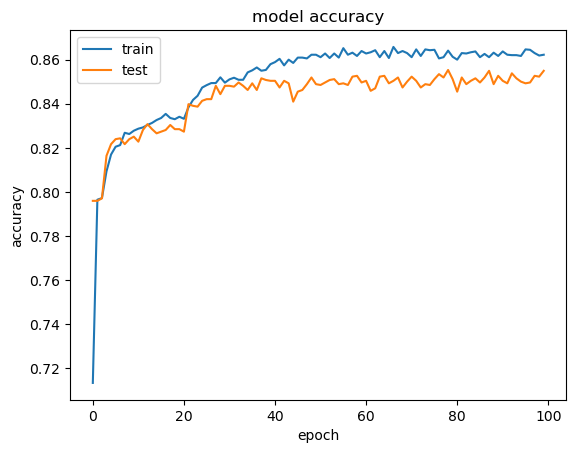

In [16]:
import matplotlib.pyplot as plt
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()